## Prerequisites

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
import numpy as np
import pandas as pd
from scipy import stats

from src.dataset.make_dataset import Dataset
from src.features.build_features import *
from src.features.utils import convert_category_cols_lgb
from src.model.train import *

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500
pd.options.display.max_columns = None

%matplotlib inline

In [5]:
ds = Dataset()
ds.load_dataset()

In [37]:
build_uuid(ds)

In [38]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['isFraud'] = y

## Analysis of number of transactions per card and fraud rate

In [7]:
valid_card = X["card1"].value_counts()

In [13]:
print(f"card1 goes from {min(X['card1'])} to {max(X['card1'])}")

card1 goes from 1000 to 18396


In [8]:
len(valid_card[valid_card < 2]) / len(valid_card)

0.2541134804102413

In [44]:
fraud_count_per_card = X[['card1', 'isFraud']].groupby('card1').agg(['sum', 'count'])
fraud_count_per_card.columns = fraud_count_per_card.columns.get_level_values(1)
fraud_count_per_card['fraudRate'] = fraud_count_per_card['sum'] / fraud_count_per_card['count']

In [15]:
print(f"Counts of card1 goes from {min(fraud_count_per_card['count'])} to {max(fraud_count_per_card['count'])}")

Counts of card1 goes from 1 to 14932


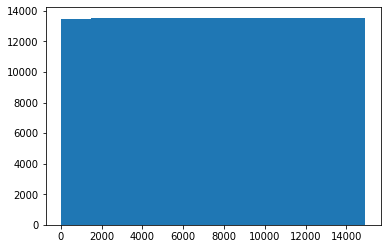

In [28]:
plt.hist(fraud_count_per_card['count'], cumulative=True)
plt.show()

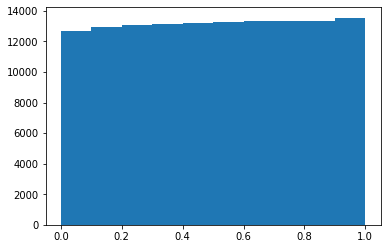

In [31]:
plt.hist(fraud_count_per_card['fraudRate'], cumulative=True)
plt.show()

In [11]:
fraud_count_per_card.head(5)

,sum,count,fraudRate
card1,,,
1000,0.0,1,0.0
1001,0.0,3,0.0
1004,0.0,5,0.0
1005,0.0,1,0.0
1006,0.0,3,0.0


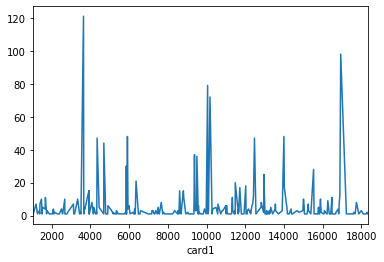

In [79]:
fraud_count_per_card[fraud_count_per_card['fraudRate'] > 0.5]['count'].plot()

In [82]:
fraud_count_per_card[fraud_count_per_card['count'] > 2]['fraudRate'].mean()

0.027891625887406544

In [84]:
fraud_count_per_card[fraud_count_per_card['count'] > 4]['fraudRate'].mean()

0.026960933406952655

## UUID

In [45]:
fraud_count_per_uid = X[['uid3', 'isFraud']].groupby('uid3').agg(['sum', 'count'])
fraud_count_per_uid.columns = fraud_count_per_uid.columns.get_level_values(1)
fraud_count_per_uid['fraudRate'] = fraud_count_per_uid['sum'] / fraud_count_per_uid['count']

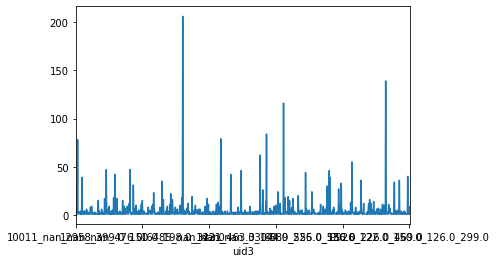

In [46]:
fraud_count_per_uid[fraud_count_per_uid['fraudRate'] > 0.5]['count'].plot()

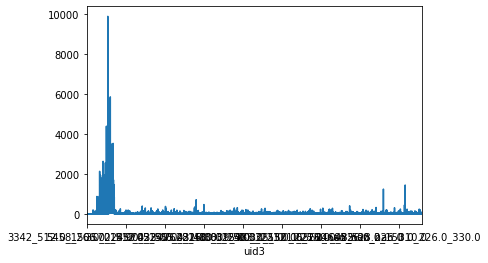

In [54]:
fraud_count_per_uid.sort_values("fraudRate", ascending=False)['count'].plot()
plt.show()

In [112]:
X["DeviceInfo"].str.split("/", expand=True)[0].unique()

array([None, 'SAMSUNG SM-G892A Build', 'iOS Device', ..., 'LDN-LX3 Build',
       'Z955A', 'LG-E975'], dtype=object)